In [6]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

%cd D:/SAME/Faradars/Python/06-Machine Learning With Python Faradars/11-Dimensity Reduction1/Files and Codes
    
seed = np.genfromtxt('seeds-width-vs-length.csv', delimiter=',')

width = seed[:,0]
length = seed[:,1]

correlation, _ = pearsonr(width, length)
correlation


D:\SAME\Faradars\Python\06-Machine Learning With Python Faradars\11-Dimensity Reduction1\Files and Codes


0.8604149377143466

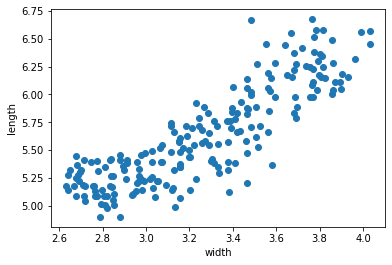

In [7]:
plt.plot(width, length, 'o')
plt.xlabel('width')
plt.ylabel('length')
plt.show()

# PCA

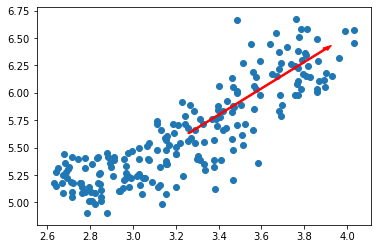

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(seed)
transformed = pca.transform(seed)

mean = pca.mean_
FPC = pca.components_[0]

plt.scatter(width, length)
plt.arrow(mean[0], mean[1], FPC[0], FPC[1], color='red', width=0.01)
plt.show()

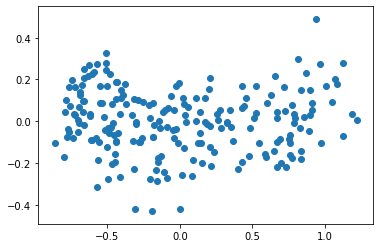

In [10]:
plt.scatter(transformed[:,0], transformed[:,1])
plt.show()

## Iris Dataset

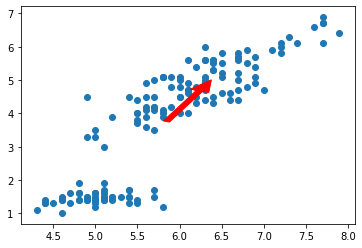

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_model = PCA()
iris_model.fit(iris.data[:,[0,2]])
iris_transformed = iris_model.transform(iris.data[:,[0,2]])

mean = iris_model.mean_
First_PC = iris_model.components_[0]

plt.scatter(iris.data[:,0], iris.data[:,2])
plt.arrow(mean[0], mean[1], First_PC[0], First_PC[1], color='red', width = 0.08)

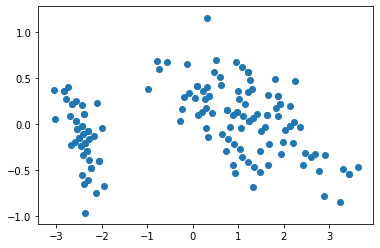

In [19]:
plt.scatter(iris_transformed[:,0], iris_transformed[:,1])
plt.show()

# Intrinsic Dimension

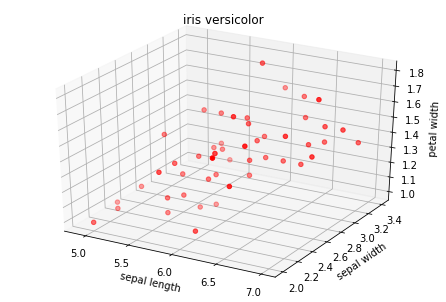

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

versicolor = iris.data[50:100]

versicolor = versicolor[:,[0,1,3]]

ax.scatter(versicolor[:,0], versicolor[:,1], versicolor[:,2], c='red')

ax.set_title('iris versicolor')

ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal width')
plt.show()

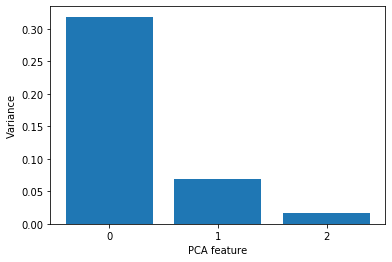

In [24]:
vc_pca = PCA()
vc_pca.fit(versicolor)
vc_transformed = vc_pca.transform(versicolor)

# nfeature

nfeature = range(vc_pca.n_components_)
var_feature = vc_pca.explained_variance_

plt.bar(nfeature, var_feature)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(nfeature)
plt.show()

# Dimension Reduction

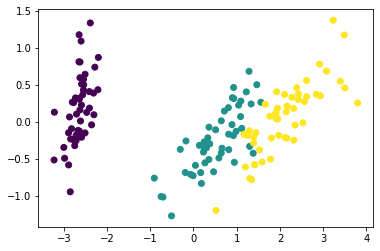

In [27]:
dim_r = PCA(n_components=2)
dim_r.fit(iris.data)
dim_r_transformed = dim_r.transform(iris.data)

plt.scatter(dim_r_transformed[:,0], dim_r_transformed[:,1], c=iris.target)
plt.show()

# SVD

## Word Frequency Array

In [28]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [32]:
docs = ['you are watching machine learning course',
       'word frequency array ia a part of unsupervised learning from machine learning course',
       'Faradars is an online educational website']

titles = ['first doc','second doc', 'third doc']

In [34]:
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(docs)
words = tfidf.get_feature_names()
#csr_mat.toarray()
tfidf.vocabulary_

{'you': 19,
 'are': 1,
 'watching': 16,
 'machine': 11,
 'learning': 10,
 'course': 3,
 'word': 18,
 'frequency': 6,
 'array': 2,
 'ia': 8,
 'part': 14,
 'of': 12,
 'unsupervised': 15,
 'from': 7,
 'faradars': 5,
 'is': 9,
 'an': 0,
 'online': 13,
 'educational': 4,
 'website': 17}

In [35]:
svd = TruncatedSVD(n_components=2)
kmeans = KMeans(n_clusters=2)

pipeline = make_pipeline(svd, kmeans)

pipeline.fit(csr_mat)
labels = pipeline.predict(csr_mat)

In [37]:
df = pd.DataFrame({'labels':labels, 'docs':titles})
print(df.sort_values('labels'))
print(docs)

   labels        docs
2       0   third doc
0       1   first doc
1       1  second doc
['you are watching machine learning course', 'word frequency array ia a part of unsupervised learning from machine learning course', 'Faradars is an online educational website']


# NMF
Non-negative matrix factorization

In [38]:
from sklearn.decomposition import NMF

In [39]:
nmf = NMF(n_components=2)
nmf.fit(csr_mat)
nmf_trf = nmf.transform(csr_mat)

In [40]:
pd.DataFrame(nmf.components_, columns=sorted(tfidf.vocabulary_))

,an,are,array,course,educational,faradars,frequency,from,ia,is,learning,machine,of,online,part,unsupervised,watching,website,word,you
0,0.000000,0.30351,0.195008,0.379136,0.000000,0.000000,0.195008,0.195008,0.195008,0.000000,0.527445,0.379136,0.195008,0.000000,0.195008,0.195008,0.30351,0.000000,0.195008,0.30351
1,0.408248,0.00000,0.000000,0.000000,0.408248,0.408248,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.00000,0.408248,0.000000,0.00000


In [43]:
nmf_df = pd.DataFrame(nmf_trf, index=titles)
nmf_df

,0,1
first doc,0.757056,0.0
second doc,0.757056,0.0
third doc,0.000000,1.0


## Example 2

In [44]:
mat = [[1, 2, 3],
      [4, 5, 6,],
      [7, 8, 9]]

In [45]:
ex2_nmf = NMF(n_components=2)
ex2_nmf.fit(mat)
nmf_features = ex2_nmf.transform(mat)
print(nmf_features)
print()
print(ex2_nmf.components_)

[[0.49770353 2.01555509]
 [1.9886994  1.00775116]
 [3.47968482 0.        ]]

[[2.01166962 2.29905988 2.58644549]
 [0.         0.42480675 0.84963252]]


In [46]:
np.dot(nmf_features, ex2_nmf.components_)

array([[1.00121507, 2.00047162, 2.99976419],
       [4.00060618, 5.0002385 , 5.99988075],
       [6.99997626, 8.00000376, 9.00001512]])

## Grayscale

In [47]:
import csv

In [51]:
data = open('D:/SAME/Faradars/Python/06-Machine Learning With Python Faradars/01-Intro/Files and Codes/led-digits.csv')
samples = [[float(x) for x in rec]for rec in csv.reader(data, delimiter=',')]
digit = np.array(samples[0])
bitmap = digit.reshape((13,8))
bitmap

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

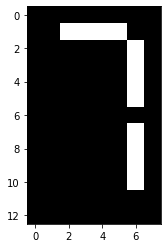

In [52]:
plt.imshow(bitmap, cmap='gray')
plt.show()

In [53]:
model = NMF(n_components=7)
features = model.fit_transform(samples)

In [54]:
def show_as_image(s):
    bitmap = s.reshape(13,8)
    plt.figure()
    plt.imshow(bitmap, cmap='gray')
    plt.colorbar()
    plt.show()

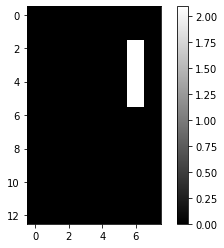

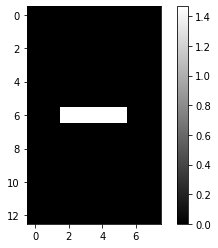

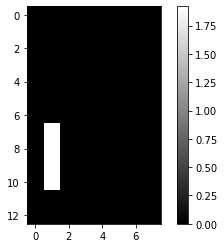

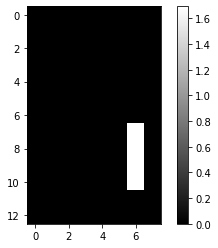

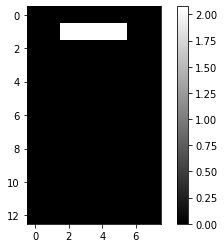

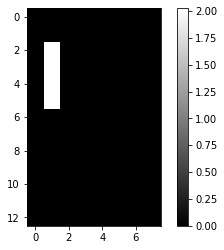

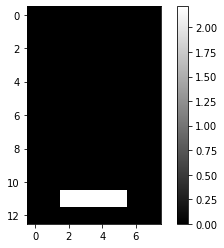

[None, None, None, None, None, None, None]

In [55]:
[show_as_image(components) for components in model.components_]

In [56]:
digit_features = features[0,:]
print(digit_features, '\n', model.components_)

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37551667e-16] 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.09719700e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.09719700e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.09719700e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.09719700e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.000

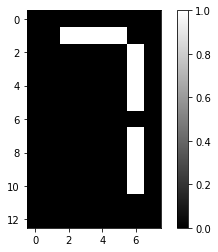

In [57]:
first_digit = np.dot(digit_features, model.components_)
show_as_image(first_digit)

# Recommender System

In [58]:
docs = ['this video is about machine learning',
       'faradars is an educational website',
       'kmeans is a way to clustering that is unsupervised learning method']

titles = ['first doc', 'second doc', 'third doc']

In [59]:
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(docs)
words = tfidf.vocabulary_

In [60]:
model = NMF(n_components=2)
model.fit(csr_mat)
features = model.transform(csr_mat)
features

array([[0.68647032, 0.        ],
       [0.        , 1.06150145],
       [0.67554749, 0.02681946]])

## Cosine Similarity

In [61]:
from sklearn.preprocessing import normalize

norm_features = normalize(features)
df = pd.DataFrame(norm_features, index=titles)
df

,0,1
first doc,1.000000,0.000000
second doc,0.000000,1.000000
third doc,0.999213,0.039669


In [63]:
article = df.loc['first doc']
similarities = df.dot(article)
similarities.nlargest()

first doc     1.000000
third doc     0.999213
second doc    0.000000
dtype: float64